In [1]:
!pip install numpy pandas matplotlib seaborn 

In [3]:
import sqlite3

conn = sqlite3.connect('sales.db')
cursor = conn.cursor()


cursor.execute('''
               CREATE TABLE IF NOT EXISTS sales_data(
                   id INTEGER PRIMARY KEY,
                   product TEXT,
                   quantity INTEGER,
                   price REAL,
                   sale_date TEXT
               )
                               
''')

sample_data = [
    ('Laptop', 5, 999.99, '2023-01-15'),
    ('Phone', 10, 699.99, '2023-01-15'),
    ('Laptop', 3, 999.99, '2023-01-16'),
    ('Tablet', 7, 399.99, '2023-01-16'),
    ('Phone', 2, 699.99, '2023-01-17'),
    ('Tablet', 4, 399.99, '2023-01-18')
]

cursor.executemany('INSERT INTO sales_data(product, quantity, price, sale_date) VALUES (?,?,?,?)', sample_data)


conn.commit()
cursor.close()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

query = 'SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales_data GROUP BY product'

df = pd.read_sql_query(query, conn)
print(df)

  product  total_qty   revenue
0  Laptop         16  15999.84
1   Phone         24  16799.76
2  Tablet         22   8799.78


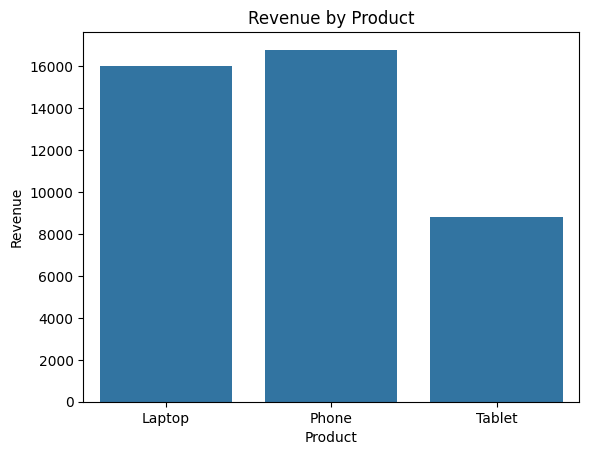

In [13]:
import seaborn as sns
sns.barplot(x='product' , y='revenue' , data = df)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.show()